In [1]:
pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.2 MB/s eta 0:00:00


In [2]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline




In [3]:
#Loading the CSV file name has been changed to USPolo.csv
df = pd.read_csv('/content/drive/MyDrive/Social Media And Web Analytics/USPolo.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Missing values
missing_values = df.isnull().sum()
missing_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Name                2
ReviewText          0
DateOfExperience    0
Location            0
dtype: int64

In [5]:
df.describe()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,ReviewText,DateOfExperience,Location
count,9316,9318,9318,9318
unique,8872,8023,1408,111
top,customer,Date of experience: 10 February 2020,10-Feb-20,US
freq,58,38,120,8165


In [6]:
#Checking No of 'Date of experience:' in ReviewText column
count_date_of_experience = df['ReviewText'].str.contains('Date of experience:', case=False, na=False).sum()

print(count_date_of_experience)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2169


In [7]:
#In Reviewtext column adding DATE wherever there is Date of experience:
df['ReviewText'] = df['ReviewText'].str.replace('Date of experience: \d{1,2} \w+ \d{4}', '[DATE]', regex=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\d'
<>:2: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-7-c1dcd8f80bc4>:2: DeprecationWarning: invalid escape sequence '\d'
  df['ReviewText'] = df['ReviewText'].str.replace('Date of experience: \d{1,2} \w+ \d{4}', '[DATE]', regex=True)


In [8]:
#Creating function to clean text data
def clean_text(text):
    text = re.sub(r'<.*?>', '', text) #Removing HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text) #Removing special characters
    text = text.lower() #Converting to lowercase (Normalization)
    return text


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Cleaning the ReviewText column and creating into new one 'ProcessedReviewText'
df['ProcessedReviewText'] = df['ReviewText'].apply(clean_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,ReviewText,DateOfExperience,Location,ProcessedReviewText
0,GRAVINNIJR/JORGE A,Well I’m disappointed with my last order was a...,03-Apr-24,US,well im disappointed with my last order was a ...
1,R U,I found out later when I checked my order rece...,12-Apr-24,US,i found out later when i checked my order rece...
2,john lee,"I ordered 20 items and only received 19, I con...",03-Apr-24,US,i ordered items and only received i contacte...
3,Erika Varga,"i havent recieve my parcel, yet. buy the notif...",12-Apr-24,US,i havent recieve my parcel yet buy the notific...
4,Dung Le,Products are good. Packaging in boxes tapes op...,12-Mar-24,US,products are good packaging in boxes tapes ope...
...,...,...,...,...,...
9313,David,Product exactly what I wanted. Great service ...,10-Feb-20,US,product exactly what i wanted great service w...
9314,Asela Acosta,Very thankful with customer support. They were...,10-Feb-20,US,very thankful with customer support they were ...
9315,Anita Callahan,[DATE],10-Feb-20,US,date
9316,Justin,[DATE],10-Feb-20,US,date


In [11]:
#Removing stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = ' '.join(word for word in tokens if word not in stop_words)
    return filtered_text
df['ProcessedReviewText'] = df['ProcessedReviewText'].apply(remove_stopwords)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,ReviewText,DateOfExperience,Location,ProcessedReviewText
0,GRAVINNIJR/JORGE A,Well I’m disappointed with my last order was a...,03-Apr-24,US,well im disappointed last order lot shirts pol...
1,R U,I found out later when I checked my order rece...,12-Apr-24,US,found later checked order receipt route packag...
2,john lee,"I ordered 20 items and only received 19, I con...",03-Apr-24,US,ordered items received contacted customer serv...
3,Erika Varga,"i havent recieve my parcel, yet. buy the notif...",12-Apr-24,US,havent recieve parcel yet buy notification shi...
4,Dung Le,Products are good. Packaging in boxes tapes op...,12-Mar-24,US,products good packaging boxes tapes opened tra...
...,...,...,...,...,...
9313,David,Product exactly what I wanted. Great service ...,10-Feb-20,US,product exactly wanted great service prompt ha...
9314,Asela Acosta,Very thankful with customer support. They were...,10-Feb-20,US,thankful customer support helpful
9315,Anita Callahan,[DATE],10-Feb-20,US,date
9316,Justin,[DATE],10-Feb-20,US,date


In [13]:
#Saving the processed data
df.to_csv('/content/drive/MyDrive/Social Media And Web Analytics/USPolo_Preprocessed.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#Loading the CSV file
processed = pd.read_csv('/content/drive/MyDrive/Social Media And Web Analytics/USPolo_Preprocessed.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
processed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,ReviewText,DateOfExperience,Location,ProcessedReviewText
0,GRAVINNIJR/JORGE A,Well I’m disappointed with my last order was a...,03-Apr-24,US,well im disappointed last order lot shirts pol...
1,R U,I found out later when I checked my order rece...,12-Apr-24,US,found later checked order receipt route packag...
2,john lee,"I ordered 20 items and only received 19, I con...",03-Apr-24,US,ordered items received contacted customer serv...
3,Erika Varga,"i havent recieve my parcel, yet. buy the notif...",12-Apr-24,US,havent recieve parcel yet buy notification shi...
4,Dung Le,Products are good. Packaging in boxes tapes op...,12-Mar-24,US,products good packaging boxes tapes opened tra...
...,...,...,...,...,...
9313,David,Product exactly what I wanted. Great service ...,10-Feb-20,US,product exactly wanted great service prompt ha...
9314,Asela Acosta,Very thankful with customer support. They were...,10-Feb-20,US,thankful customer support helpful
9315,Anita Callahan,[DATE],10-Feb-20,US,date
9316,Justin,[DATE],10-Feb-20,US,date


In [16]:
print(processed.isnull().sum())


Name                    2
ReviewText              0
DateOfExperience        0
Location                0
ProcessedReviewText    10
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#Filling missing entries with a placeholder
processed['ProcessedReviewText'].fillna('no content', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
#Imputing Name column missing values with 'Unknown'
processed['Name'].fillna('Unknown', inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
print(processed.isnull().sum())

Name                   0
ReviewText             0
DateOfExperience       0
Location               0
ProcessedReviewText    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
print(processed.duplicated().sum())


0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#Saving the processed data
processed.to_csv('/content/drive/MyDrive/Social Media And Web Analytics/USPolo_Preprocessed.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#Downloading VADER's lexicon
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
#PROVIDING SENTIMENT SCORE TO EACH ROW for US Polo
# Initializing VADER
sia = SentimentIntensityAnalyzer()

#Function for sentiment score
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# 'ProcessedReviewText' is the column after proprocessing ReviewText column
processed['SentimentScore'] = processed['ProcessedReviewText'].apply(get_sentiment)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#SENTIMENT ANALYSIS
#Defining threshold values
#ONLY ZERO IS NEUTRAL
positive_threshold = 0.01
negative_threshold = -0.01

#Function to categorize sentiment based on thresholds
def categorize_sentiment(score):
    if score > positive_threshold:
        return 'Positive'
    elif score < negative_threshold:
        return 'Negative'
    else:
        return 'Neutral'

#Appling the function to the SentimentScore column
processed['SentimentCategory'] = processed['SentimentScore'].apply(categorize_sentiment)
sentiment_counts = processed['SentimentCategory'].value_counts()
print(sentiment_counts)


SentimentCategory
Positive    5007
Neutral     3084
Negative    1227
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-62-f5f911fbedc5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


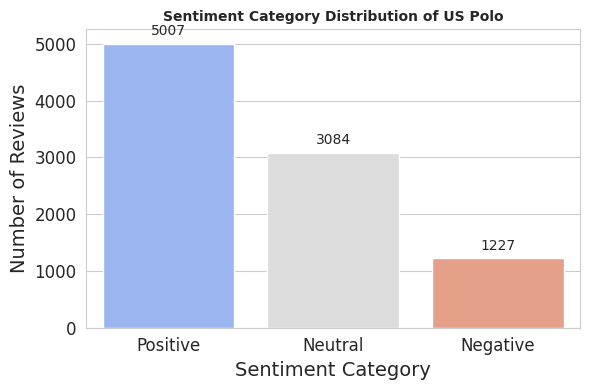

In [62]:
#Counting the number of occurrences of each sentiment category
sentiment_counts = processed['SentimentCategory'].value_counts()
#Creating a bar plot for the sentiment categories
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid") #white background
bar = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
# Annotating the exact counts on top of each bar
for p in bar.patches:
    bar.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points')

plt.title('Sentiment Category Distribution of US Polo', fontsize=10, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
#Removing rows 'SentimentScore' where null vales present
processed = processed.dropna(subset=['SentimentScore'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


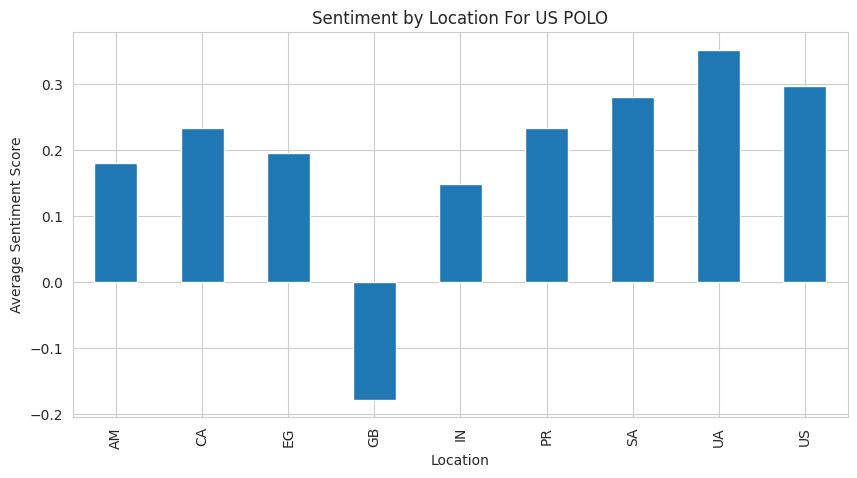

In [28]:
#Filter locations with a minimum number of reviews
min_reviews = 30   #Threshold OF 30 reviews minimum
location_counts = processed['Location'].value_counts()
filtered_locations = location_counts[location_counts >= min_reviews].index

#Including only these locations more than 30 reviews
filtered_processed = processed[processed['Location'].isin(filtered_locations)]

#Recalculating sentiments
filtered_location_sentiments = filtered_processed.groupby('Location')['SentimentScore'].mean()

#Ploting Sentiment by Location
filtered_location_sentiments.plot(kind='bar', figsize=(10, 5), title='Sentiment by Location For US POLO')
plt.ylabel('Average Sentiment Score')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


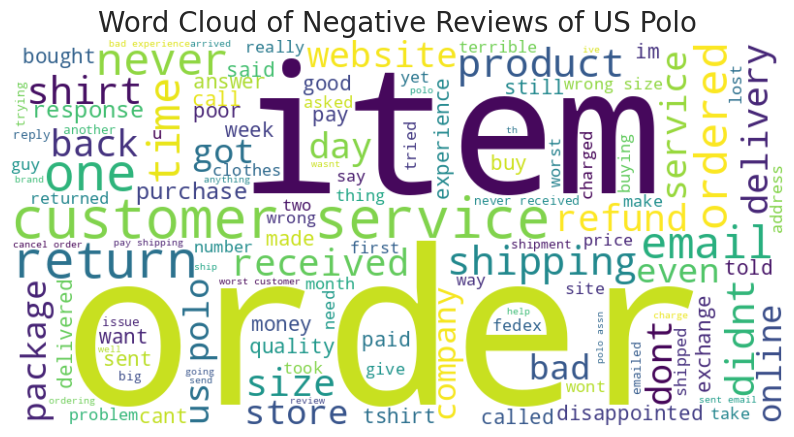

In [29]:
#Filtering reviews by sentimentcategory
negative_reviews = processed[processed['SentimentCategory'] == 'Negative']['ProcessedReviewText']
positive_reviews = processed[processed['SentimentCategory'] == 'Positive']['ProcessedReviewText']

#Combining all negative reviews into a string
negative_text = " ".join(review for review in negative_reviews)

#Combining all positive reviews into a string
positive_text = " ".join(review for review in positive_reviews)

#Generating a word cloud image for negative reviews
negative_wordcloud = WordCloud(background_color='white', max_words=120, contour_color='steelblue', width=800, height=400).generate(negative_text)

#Generating a word cloud image for positive reviews
positive_wordcloud = WordCloud(background_color='white', max_words=120, contour_color='steelblue', width=800, height=400).generate(positive_text)

#Displaying the generated image for negative reviews
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews of US Polo', size=20)
plt.show()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


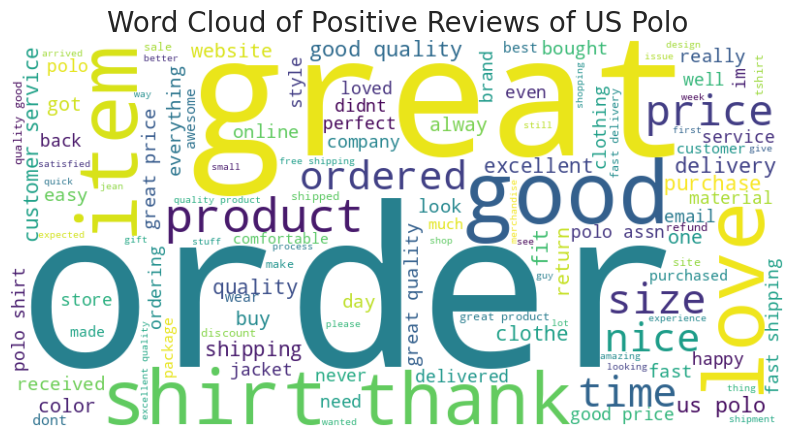

In [30]:
#Displaying the generated image for positive reviews
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews of US Polo', size=20)
plt.show()

In [31]:
processed['ProcessedReviewText']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       well im disappointed last order lot shirts pol...
1       found later checked order receipt route packag...
2       ordered items received contacted customer serv...
3       havent recieve parcel yet buy notification shi...
4       products good packaging boxes tapes opened tra...
                              ...                        
9313    product exactly wanted great service prompt ha...
9314                    thankful customer support helpful
9315                                                 date
9316                                                 date
9317                                                 date
Name: ProcessedReviewText, Length: 9318, dtype: object

In [32]:
#Tokenizing the ProcessedReviewText into single words
processed['tokenized'] = processed['ProcessedReviewText'].apply(lambda x: simple_preprocess(x, deacc=True))  # deacc=True removes punctuations


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Creating a dictionary representation of the documents
dictionary = Dictionary(processed['tokenized'])
#Filtering extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
# Creating a bag-of-words model for each document
corpus = [dictionary.doc2bow(doc) for doc in processed['tokenized']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#Setting training parameters for Topic creation
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

#Making an index to word dictionary
temp = dictionary[0]  #Loading dictonary
id2word = dictionary.id2token

#Training the model
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
#Printing the Keyword in the 10 topics
topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.088*"polo" + 0.058*"love" + 0.043*"us" + 0.030*"quality" + 0.025*"clothes" + 0.023*"like" + 0.022*"shirts" + 0.019*"really" + 0.019*"assn" + 0.017*"great"')
(1, '0.124*"time" + 0.068*"took" + 0.061*"long" + 0.051*"items" + 0.031*"get" + 0.031*"arrived" + 0.028*"first" + 0.025*"delivered" + 0.022*"dress" + 0.020*"sizes"')
(2, '0.057*"customer" + 0.052*"service" + 0.035*"never" + 0.027*"order" + 0.020*"email" + 0.018*"back" + 0.016*"one" + 0.014*"get" + 0.014*"response" + 0.014*"sent"')
(3, '0.152*"shipping" + 0.033*"purchase" + 0.028*"order" + 0.026*"time" + 0.025*"paid" + 0.024*"free" + 0.022*"delivery" + 0.022*"happy" + 0.021*"process" + 0.017*"days"')
(4, '0.125*"good" + 0.117*"great" + 0.098*"quality" + 0.046*"fast" + 0.043*"excellent" + 0.043*"price" + 0.040*"service" + 0.035*"delivery" + 0.034*"product" + 0.034*"prices"')
(5, '0.930*"date" + 0.013*"fantastic" + 0.012*"continue" + 0.009*"bigger" + 0.007*"done" + 0.000*"estimated" + 0.000*"upset" + 0.000*"fact" + 0.000*"expec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
#Computing Coherence Score for accuracy
coherence_model_lda = CoherenceModel(model=model, texts=processed['tokenized'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)# Here, accuracy of the model is 0.629999172814193 model is very good


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.629999172814193


In [50]:
from IPython.core.display import display, HTML
# Setting the size of PyLDAvis output via IPython display configurations
display(HTML("<style>.output {width: 30%; height: 400px;}</style>"))
#Visualizing the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
text_data = processed['ProcessedReviewText'].apply(lambda x: x.split())

#Training a Word2Vec model
model_w2v = Word2Vec(sentences=text_data, vector_size=100, window=5, min_count=1, workers=4)

#Function to create a document vector by averaging word vectors
def document_vector(doc):
    #Checkung words in the model's vocabulary
    doc = [word for word in doc if word in model_w2v.wv.index_to_key]
    if len(doc) == 0:
        return np.zeros(model_w2v.vector_size)  #Returning a zero vector if doc has no words in the model's vocabulary
    return np.mean(model_w2v.wv[doc], axis=0)
#Re-calculating document vectors
doc_vectors = np.array([document_vector(doc) for doc in text_data])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
#K-Means CLUSTERING
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(doc_vectors)
clusters = kmeans.labels_
#Adding cluster labels
processed['Cluster'] = clusters
print(processed.head(8))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 Name                                         ReviewText  \
0  GRAVINNIJR/JORGE A  Well I’m disappointed with my last order was a...   
1                 R U  I found out later when I checked my order rece...   
2            john lee  I ordered 20 items and only received 19, I con...   
3         Erika Varga  i havent recieve my parcel, yet. buy the notif...   
4             Dung Le  Products are good. Packaging in boxes tapes op...   

  DateOfExperience Location  \
0        03-Apr-24       US   
1        12-Apr-24       US   
2        03-Apr-24       US   
3        12-Apr-24       US   
4        12-Mar-24       US   

                                 ProcessedReviewText  SentimentScore  \
0  well im disappointed last order lot shirts pol...         -0.5037   
1  found later checked order receipt route packag...          0.5423   
2  ordered items received contacted customer serv...         -0.8519   
3  havent recieve parcel yet buy notification shi...          0.0000

In [56]:
#Counting the number of points in each cluster
cluster_counts = processed['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    2425
4    2022
3    1954
0    1756
2    1161
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9318 samples in 0.001s...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computed neighbors for 9318 samples in 1.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9318
[t-SNE] Computed conditional probabilities for sample 2000 / 9318
[t-SNE] Computed conditional probabilities for sample 3000 / 9318
[t-SNE] Computed conditional probabilities for sample 4000 / 9318
[t-SNE] Computed conditional probabilities for sample 5000 / 9318
[t-SNE] Computed conditional probabilities for sample 6000 / 9318
[t-SNE] Computed conditional probabilities for sample 7000 / 9318
[t-SNE] Computed conditional probabilities for sample 8000 / 9318
[t-SNE] Computed conditional probabilities for sample 9000 / 9318
[t-SNE] Computed conditional probabilities for sample 9318 / 9318
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.165695
[t-SNE] KL divergence after 300 iterations: 1.732378


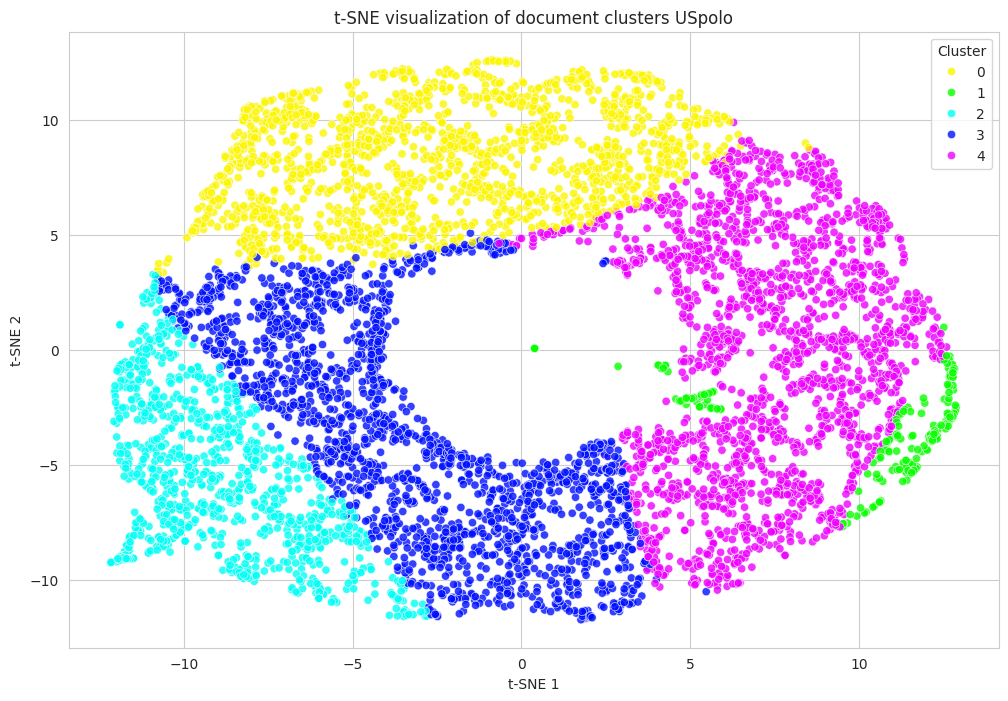

In [57]:
#t-SNE for Dimensionality Reduction

# Reducing dimensions
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(doc_vectors)

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue= processed['Cluster'],
    palette=sns.color_palette("hsv", len(set(clusters))),
    legend="full",
    alpha=0.8
)
plt.title('t-SNE visualization of document clusters USpolo')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()




In [58]:
# Loading a pre-trained and fine-tuned sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
processed['sentiment'] = processed['ProcessedReviewText'].apply(lambda x: nlp(x)[0]['label'])
print(processed[['ProcessedReviewText', 'sentiment']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

                                 ProcessedReviewText sentiment
0  well im disappointed last order lot shirts pol...    1 star
1  found later checked order receipt route packag...   3 stars
2  ordered items received contacted customer serv...    1 star
3  havent recieve parcel yet buy notification shi...   5 stars
4  products good packaging boxes tapes opened tra...   4 stars


In [59]:
# Viewing dataframe
print(processed[['ProcessedReviewText','SentimentScore' ,'SentimentCategory',  'sentiment', 'Cluster' ]].head())

                                 ProcessedReviewText  SentimentScore  \
0  well im disappointed last order lot shirts pol...         -0.5037   
1  found later checked order receipt route packag...          0.5423   
2  ordered items received contacted customer serv...         -0.8519   
3  havent recieve parcel yet buy notification shi...          0.0000   
4  products good packaging boxes tapes opened tra...         -0.0253   

  SentimentCategory sentiment  Cluster  
0          Negative    1 star        4  
1          Positive   3 stars        4  
2          Negative    1 star        0  
3           Neutral   5 stars        4  
4          Negative   4 stars        4  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# Saving the processed data with sentiment
processed.to_csv('Forcomparison_USPolo.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
